In [65]:
# Author Davide Aloi
# Description: Load MOHAWK results and metrics extracted with get_metrics.m and make different plots

import scipy.io
import numpy as np
import glob 
import pandas as pd
import matplotlib.pyplot as plt 

# path to your mohawk results
files = glob.glob('D:\\Raindrop_data\\p01\\*\\*\\resting_state\\*mohawk.mat')
metrics = glob.glob('D:\\Raindrop_data\\p01\\*\\*\\resting_state\\LPAT*.mat')

In [14]:
metrics

['D:\\Raindrop_data\\p01\\p01_w01\\eeg_baseline\\resting_state\\LPAT_mohawk_metric_output.mat',
 'D:\\Raindrop_data\\p01\\p01_w02\\day04_eeg\\resting_state\\LPAT_mohawk_metric_output.mat',
 'D:\\Raindrop_data\\p01\\p01_w03\\eeg_baseline\\resting_state\\LPAT_mohawk_metric_output.mat',
 'D:\\Raindrop_data\\p01\\p01_w04\\day04_eeg\\resting_state\\LPAT_mohawk_metric_output.mat',
 'D:\\Raindrop_data\\p01\\p01_w05\\eeg_baseline\\resting_state\\LPAT_mohawk_metric_output.mat',
 'D:\\Raindrop_data\\p01\\p01_w06\\day04_eeg\\resting_state\\LPAT_mohawk_metric_output.mat']

In [37]:
# lists with results
all_alpha_rel_pwr = []
all_alpha_med_con = []
all_alpha_mod_span = []
all_alpha_sd_part_coeff = []

all_delta_rel_pwr = []
all_delta_modularity = []
all_delta_med_con = []
all_delta_clust_coeff = []

for metrics_res in metrics:
    res = scipy.io.loadmat(metrics_res)
    all_alpha_rel_pwr.append(res['alpha_rel_pwr'][0][0])
    all_alpha_med_con.append(res['alpha_med_con'][0][0])
    all_alpha_mod_span.append(res['alpha_mod_span'][0][0])
    all_alpha_sd_part_coeff.append(res['alpha_sd_part_coeff'][0][0])
    all_delta_rel_pwr.append(res['delta_rel_pwr'][0][0])
    all_delta_modularity.append(res['delta_modularity'][0][0])
    all_delta_med_con.append(res['delta_med_con'][0][0])
    all_delta_clust_coeff.append(res['delta_clust_coeff'][0][0])

data = np.asarray([all_alpha_rel_pwr, all_alpha_med_con, all_alpha_mod_span,
        all_alpha_sd_part_coeff, all_delta_rel_pwr, all_delta_modularity,
        all_delta_med_con, all_delta_clust_coeff])
data

array([[5.39975998e-01, 4.46502078e-01, 1.19610776e+00, 1.65687082e+00,
        3.85139371e-01, 1.34419492e+00],
       [8.27950705e-02, 9.93262865e-02, 1.18134638e-01, 2.98886932e-01,
        1.14766114e-02, 1.20489421e-01],
       [5.35522136e+00, 4.91041081e+00, 5.30040877e+00, 5.32487406e+00,
        5.76937560e+00, 5.18795510e+00],
       [9.15618698e-02, 1.02842204e-01, 7.68554124e-02, 1.28460639e-01,
        5.54142744e-02, 1.04585306e-01],
       [9.74954082e+01, 9.79495388e+01, 9.47004494e+01, 9.29835799e+01,
        9.81777124e+01, 9.23572308e+01],
       [1.13955131e-01, 7.70264422e-02, 1.16598732e-01, 7.95879950e-02,
        1.30663991e-01, 6.64790267e-02],
       [4.16661721e-02, 1.01524992e-01, 1.35899483e-01, 1.08405067e-01,
        7.17908160e-03, 3.33763515e-01],
       [5.65088325e-01, 5.13073172e-01, 5.55427660e-01, 5.55946187e-01,
        5.49647550e-01, 5.54132953e-01]])

In [63]:
col_names = ['alpha relative power', 'alpha median connectivity',
                                         'alpha modular span', 'alpha participation coefficient (sd)',
                                         'delta relative power', 'delta modularity', 'delta median connectivity',
                                         'delta clustering coefficient']
                                         
condition_names = ['Sham baseline','Sham Day-4','Anodal baseline' ,'Anodal Day-4', 'Cathodal baseline', 'Cathodal Day-4']

all_results = pd.DataFrame(data.T, columns = col_names)
all_results = all_results.T
all_results.rename(columns = {0:condition_names[0], 1:condition_names[1],
                              2:condition_names[2], 3:condition_names[3],
                              4:condition_names[4], 5:condition_names[5]}, inplace = True)


In [64]:
all_results

,Sham baseline,Sham Day-4,Anodal baseline,Anodal Day-4,Cathodal baseline,Cathodal Day-4
alpha relative power,0.539976,0.446502,1.196108,1.656871,0.385139,1.344195
alpha median connectivity,0.082795,0.099326,0.118135,0.298887,0.011477,0.120489
alpha modular span,5.355221,4.910411,5.300409,5.324874,5.769376,5.187955
alpha participation coefficient (sd),0.091562,0.102842,0.076855,0.128461,0.055414,0.104585
delta relative power,97.495408,97.949539,94.700449,92.983580,98.177712,92.357231
delta modularity,0.113955,0.077026,0.116599,0.079588,0.130664,0.066479
delta median connectivity,0.041666,0.101525,0.135899,0.108405,0.007179,0.333764
delta clustering coefficient,0.565088,0.513073,0.555428,0.555946,0.549648,0.554133


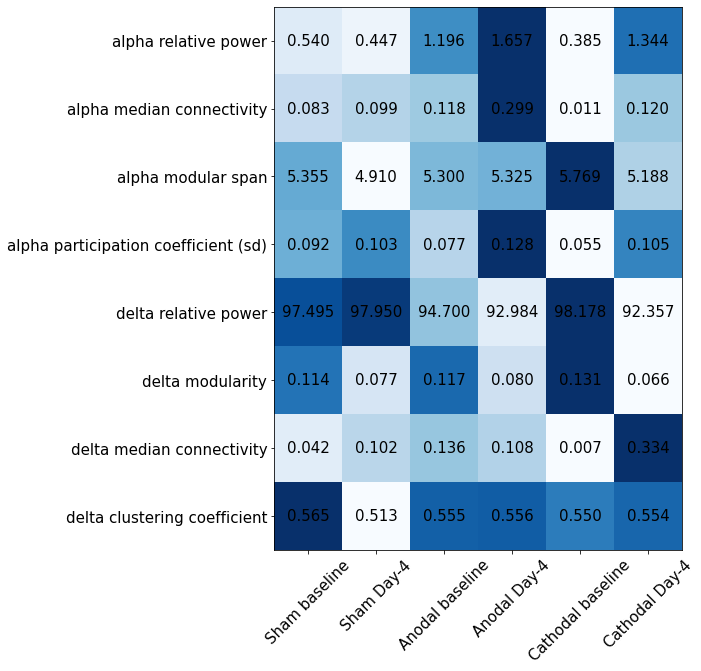

TypeError: savefig() missing 1 required positional argument: 'fname'

<Figure size 432x288 with 0 Axes>

In [143]:
colormap = plt.cm.Blues
fix, ax = plt.subplots(figsize = (18, 10))
plt.rcParams.update({'font.size': 15})

data_array = data

from numpy.ma import masked_array
masked_array_data = np.zeros(data_array.shape)
masked_array_data[0,:] = data[0]
masked_array_data = masked_array(masked_array_data, masked_array_data == 0)
s1 = ax.imshow(masked_array_data, cmap = plt.cm.Blues)



masked_array_data = np.zeros(data_array.shape)
masked_array_data[1,:] = data[1]
masked_array_data = masked_array(masked_array_data, masked_array_data == 0)
s2 = ax.imshow(masked_array_data, cmap = plt.cm.Blues)

masked_array_data = np.zeros(data_array.shape)
masked_array_data[2,:] = data[2]
masked_array_data = masked_array(masked_array_data, masked_array_data == 0)
s3 = ax.imshow(masked_array_data, cmap = plt.cm.Blues)

masked_array_data = np.zeros(data_array.shape)
masked_array_data[3,:] = data[3]
masked_array_data = masked_array(masked_array_data, masked_array_data == 0)
s4 = ax.imshow(masked_array_data, cmap = plt.cm.Blues)

masked_array_data = np.zeros(data_array.shape)
masked_array_data[4,:] = data[4]
masked_array_data = masked_array(masked_array_data, masked_array_data == 0)
s5 = ax.imshow(masked_array_data, cmap = plt.cm.Blues)

masked_array_data = np.zeros(data_array.shape)
masked_array_data[5,:] = data[5]
masked_array_data = masked_array(masked_array_data, masked_array_data == 0)
s6 = ax.imshow(masked_array_data, cmap = plt.cm.Blues)

masked_array_data = np.zeros(data_array.shape)
masked_array_data[6,:] = data[6]
masked_array_data = masked_array(masked_array_data, masked_array_data == 0)
s7 = ax.imshow(masked_array_data, cmap = plt.cm.Blues)

masked_array_data = np.zeros(data_array.shape)
masked_array_data[7,:] = data[7]
masked_array_data = masked_array(masked_array_data, masked_array_data == 0)
s8 = ax.imshow(masked_array_data, cmap = plt.cm.Blues)


for (i, j), z in np.ndenumerate(data_array):
    ax.text(j, i, '{:0.03f}'.format(z), ha='center', va='center')

plt.xticks(np.arange(0, data_array.shape[1]))
ax.set_xticklabels(condition_names)
plt.yticks(np.arange(0, data_array.shape[0]))
ax.set_yticklabels(col_names)
plt.xticks(rotation=45)

plt.show()
plt.savefig(dpi=300)

In [144]:
# might ork on this in the future
mohawk_mat = scipy.io.loadmat(files[0])
mk_tvals = mohawk_mat['tvals']
mk_matrix = mohawk_mat['matrix']
mk_graph = mohawk_mat['graphdata']

# example: to access clustering coefficient results: 
mk_ccr = mk_graph[0][1]
mk_ccr.shape
mk_ccr[0,:,:].shape


(37, 91)